In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import seaborn as sns
import numpy as np

In [2]:
import os

In [7]:
from google.colab import drive   # 코랩 드라이브와 연동
drive.mount('/content/drive')

Mounted at /content/drive


### loading dataset

In [8]:
data_path = '/content/drive/MyDrive/gachon4-2/deeplearning/week2/iris'

In [10]:
df = pd.DataFrame(pd.read_csv(os.path.join(data_path,"Iris.csv")))

In [11]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [13]:
df.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [14]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [15]:
df.keys()

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [16]:
X = np.array(df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm']].values)
Y = np.array(df['PetalWidthCm'].values)

In [17]:
print(X[:3])
print(Y[:3])


[[5.1 3.5 1.4]
 [4.9 3.  1.4]
 [4.7 3.2 1.3]]
[0.2 0.2 0.2]


In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=1)

In [33]:
print(len(X_train),len(Y_train))
print(X_train.shape, Y_train.shape)
print(len(X_test), len(Y_test))

105 105
(105, 3) (105,)
45 45


### plot EDA

array([[<Axes: title={'center': 'SepalLengthCm'}>,
        <Axes: title={'center': 'SepalWidthCm'}>],
       [<Axes: title={'center': 'PetalLengthCm'}>,
        <Axes: title={'center': 'PetalWidthCm'}>]], dtype=object)

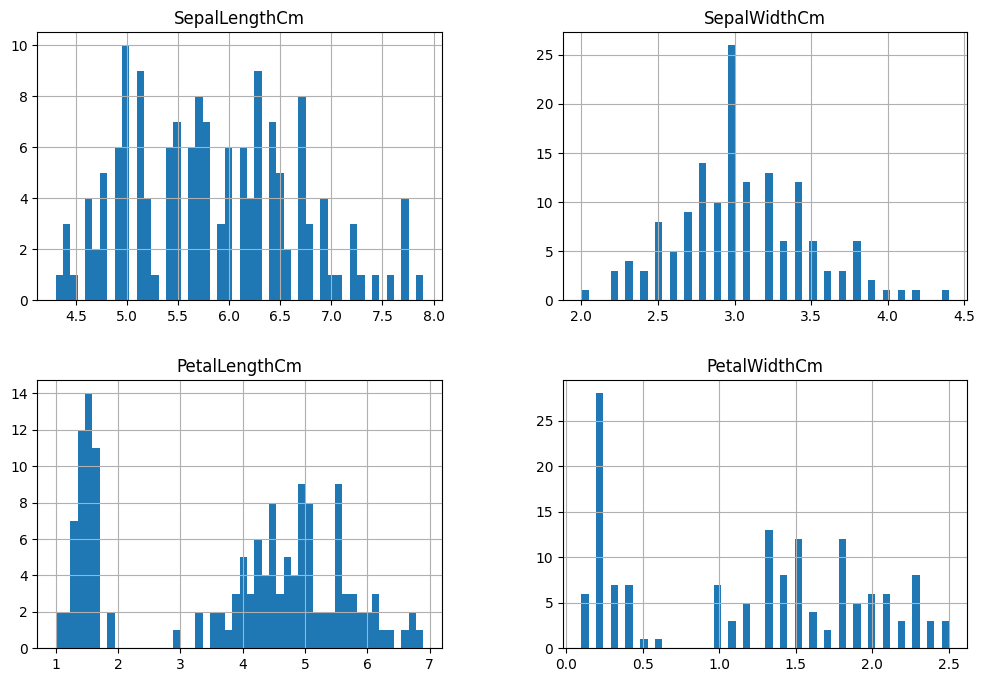

In [22]:
import matplotlib.pyplot as plt

df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species']].hist(bins=50, figsize=(12, 8))

<ipython-input-20-57123b953aca>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="viridis");


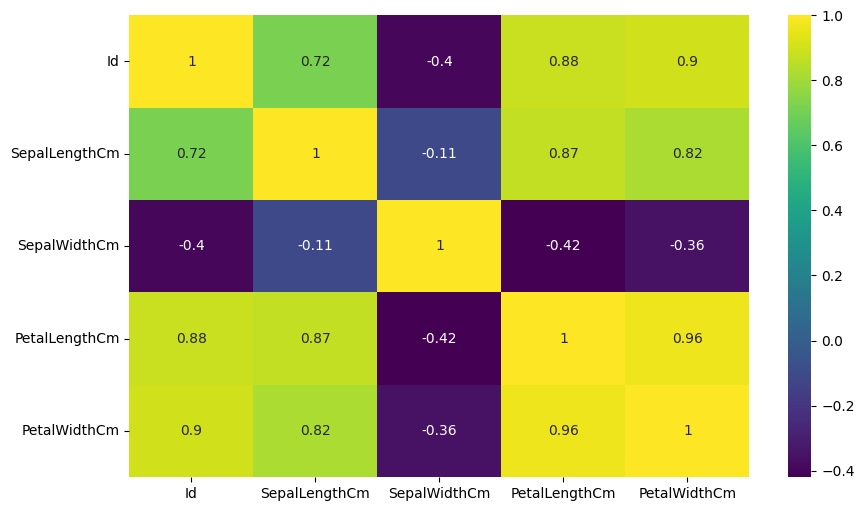

In [20]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="viridis");

### 1) "Decision Tree" model

In [34]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

def preprocess(x):
  # x=x.reshape(-1,1)
  x = mm.fit_transform(x)
  return x

In [35]:
Y_train=Y_train.reshape(-1,1)
Y_test=Y_test.reshape(-1,1)

X_train=preprocess(X_train)
Y_train=preprocess(Y_train)

X_test=preprocess(X_test)
Y_test=preprocess(Y_test)

In [38]:
# 1. train the decision tree classifier
#scikit learn decision tree model training
DT = tree.DecisionTreeRegressor()
DT = DT.fit(X_train, Y_train)

from sklearn.metrics import mean_squared_error
# 2. test the model trained on test set
prediction = DT.predict(X_test)
mean_squared_error(Y_test, prediction)


0.016700464238343028

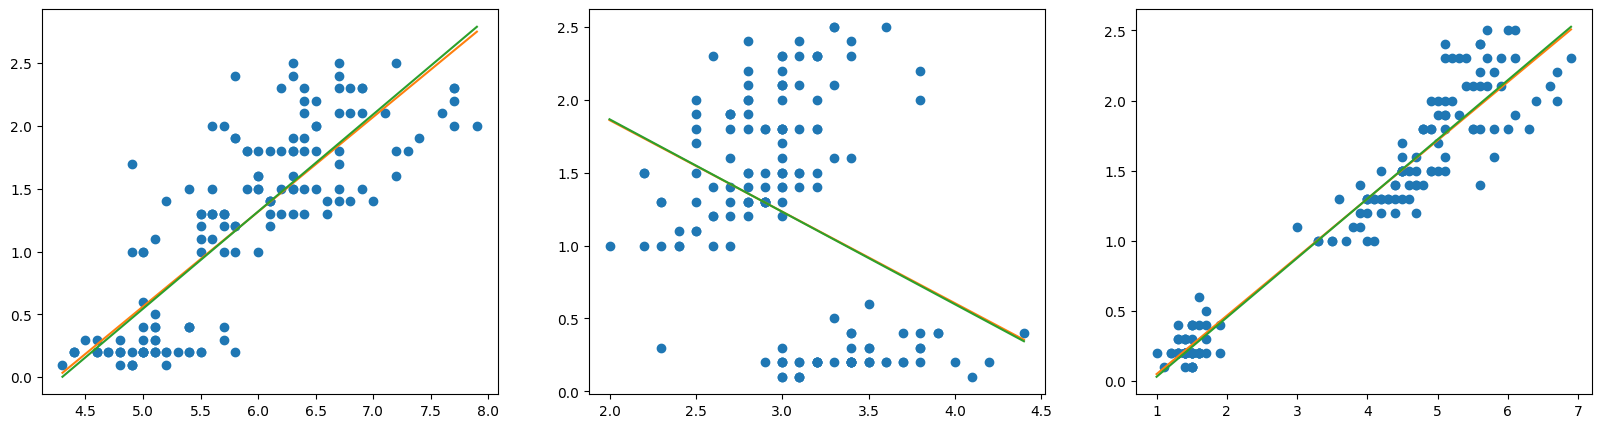

In [54]:
plt.figure(figsize=(20, 5))

inference = DT.predict(preprocess(X))
YY=preprocess(Y.reshape(-1,1))
inference = mm.inverse_transform(inference.reshape(-1,1)).reshape(1,-1)[0]

for i, x_col in enumerate(X.transpose(1,0)):
    # 3 plots here hence 1, 3
    plt.subplot(1, 3, i+1)
    x = x_col
    y = Y
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, inference, 1))(np.unique(x)))

### 2) "RandomForestClassifier" model

In [55]:
from sklearn.ensemble import RandomForestRegressor

# 1. train the LogisticRegression classifier
clf = RandomForestRegressor(max_depth=10, random_state=0)
clf = clf.fit(X_train, Y_train)

from sklearn.metrics import mean_squared_error
# 2. test the model trained on test set
prediction = clf.predict(X_test)
mean_squared_error(Y_test, prediction)

<ipython-input-55-e55e27117680>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = clf.fit(X_train, Y_train)


0.00863429272560449

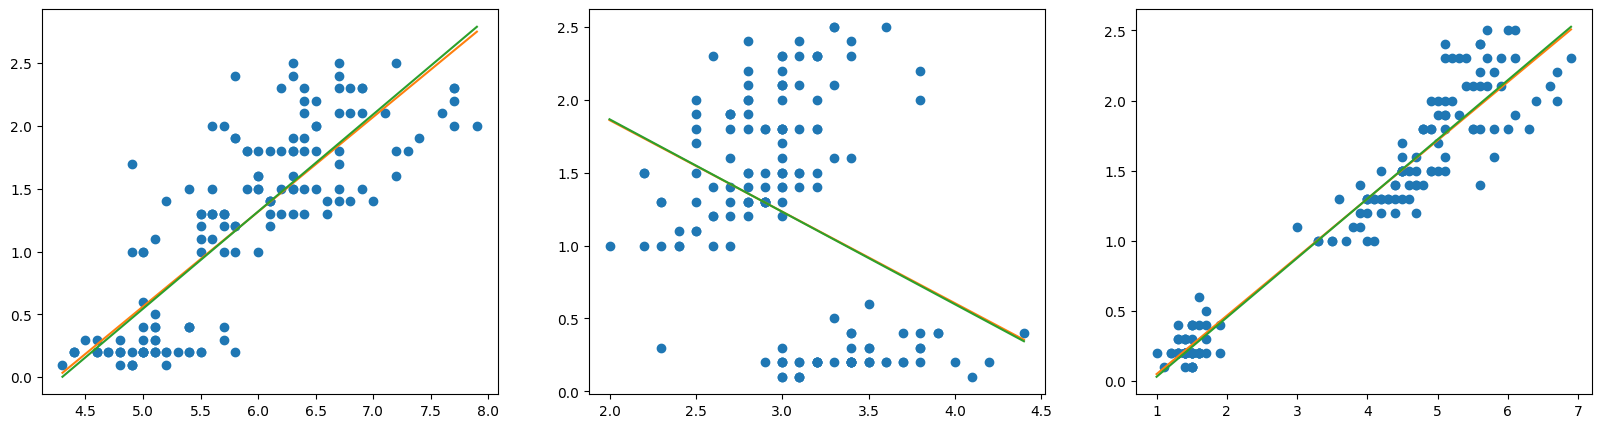

In [56]:
plt.figure(figsize=(20, 5))

inference = DT.predict(preprocess(X))
YY=preprocess(Y.reshape(-1,1))
inference = mm.inverse_transform(inference.reshape(-1,1)).reshape(1,-1)[0]

for i, x_col in enumerate(X.transpose(1,0)):
    # 3 plots here hence 1, 3
    plt.subplot(1, 3, i+1)
    x = x_col
    y = Y
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, inference, 1))(np.unique(x)))

### 3) "SVM" model

In [57]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
clf = make_pipeline(StandardScaler(), SVR(gamma='auto'))
clf = clf.fit(X_train, Y_train)

from sklearn.metrics import mean_squared_error
# 2. test the model trained on test set
prediction = clf.predict(X_test)
mean_squared_error(Y_test, prediction)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.011490344524100412

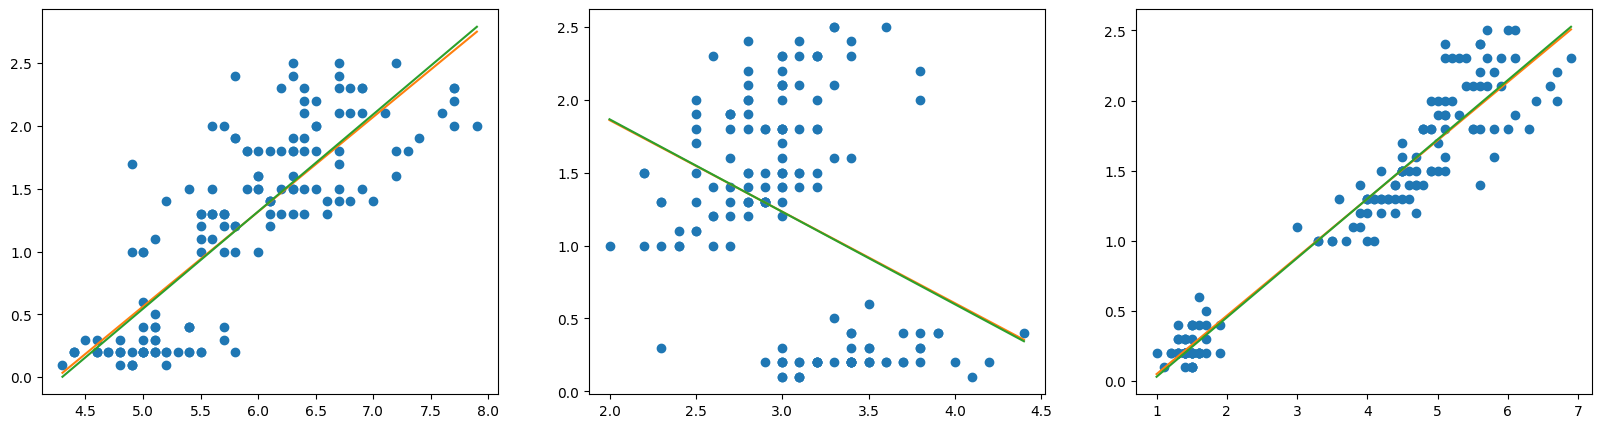

In [58]:
plt.figure(figsize=(20, 5))

inference = DT.predict(preprocess(X))
YY=preprocess(Y.reshape(-1,1))
inference = mm.inverse_transform(inference.reshape(-1,1)).reshape(1,-1)[0]

for i, x_col in enumerate(X.transpose(1,0)):
    # 3 plots here hence 1, 3
    plt.subplot(1, 3, i+1)
    x = x_col
    y = Y
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, inference, 1))(np.unique(x)))